<a href="https://colab.research.google.com/github/EmersonFranca/IDH_Atlas/blob/master/Analise_Exploratoria/1_Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2. Versões das bibliotecas importadas

In [2]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)


1.0.3
1.18.4
0.10.1


# 3. Importando os dados

In [0]:
URL_IDH_1991 = "https://github.com/EmersonFranca/IDH_Atlas/blob/master/Dados/IDH_1991.csv?raw=true"
URL_IDH_2000 = "https://github.com/EmersonFranca/IDH_Atlas/blob/master/Dados/IDH_2000.csv?raw=true"
URL_IDH_2010 = "https://github.com/EmersonFranca/IDH_Atlas/blob/master/Dados/IDH_2010.csv?raw=true"

In [0]:
dfIDH_2000 = pd.read_csv(URL_IDH_2000,sep=';')

In [5]:
dfIDH_2000.head()

,ANO,UF,Codmun6,Codmun7,Município,ESPVIDA,FECTOT,MORT1,MORT5,RAZDEP,SOBRE40,SOBRE60,T_ENV,E_ANOSESTUDO,T_ANALF11A14,T_ANALF15A17,T_ANALF15M,T_ANALF18A24,T_ANALF18M,T_ANALF25A29,T_ANALF25M,T_ATRASO_0_BASICO,T_ATRASO_0_FUND,T_ATRASO_0_MED,T_ATRASO_1_BASICO,T_ATRASO_1_FUND,T_ATRASO_1_MED,T_ATRASO_2_BASICO,T_ATRASO_2_FUND,T_ATRASO_2_MED,T_FBBAS,T_FBFUND,T_FBMED,T_FBPRE,T_FBSUPER,T_FLBAS,T_FLFUND,T_FLMED,T_FLPRE,T_FLSUPER,...,PEA18M,peso1,PESO1114,PESO1113,PESO1214,peso13,PESO15,peso1517,PESO1524,PESO1618,PESO18,Peso1820,PESO1824,Peso1921,PESO25,peso4,peso5,peso6,PESO610,Peso617,PESO65,PESOM1014,PESOM1517,PESOM15M,PESOM25M,pesoRUR,pesotot,pesourb,PIA,PIA1014,PIA1517,PIA18M,POP,POPT,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
0,2000,11,110001,1100015,ALTA FLORESTA D'OESTE,66.90,3.11,28.36,33.96,61.65,89.61,75.40,3.35,7.76,2.32,2.60,15.84,4.11,17.42,6.37,21.54,49.82,54.43,62.62,25.57,26.10,34.18,24.62,19.47,3.21,85.50,99.90,40.47,9.63,5.19,76.88,85.59,18.01,9.63,2.22,...,10724,515,2453,1899,1780,1747,17300,1848,5502,1793,15458,1699,3654,1588,11802,606,655,634,3251,7552,890,1532,895,8123,5437,14192,26533,12341,20346,3040,1830,15476,25920,24888,0.195,0.303,0.483,0.262,0.698,0.617
1,2000,11,110002,1100023,ARIQUEMES,69.52,2.77,21.68,25.99,59.88,91.91,80.15,2.92,7.61,2.64,2.52,11.77,3.57,12.81,5.28,15.76,52.48,58.38,54.89,21.16,21.67,24.89,26.35,19.96,20.22,65.70,76.08,34.92,20.81,6.57,55.27,61.64,13.88,18.93,2.03,...,29999,1784,6771,5112,5027,5075,48771,4922,15534,5040,43857,4812,10612,4550,33238,1816,1840,1720,8438,20131,2178,4206,2527,23904,16013,19385,74503,55118,57064,8285,5190,43589,71789,69829,0.314,0.358,0.556,0.343,0.742,0.674
2,2000,11,110003,1100031,CABIXI,65.62,2.95,31.99,38.27,60.81,88.40,73.03,4.56,8.02,3.24,2.46,17.50,2.99,19.42,5.31,23.80,46.67,53.61,53.44,23.55,24.82,29.98,29.79,21.57,16.58,87.72,108.11,35.20,35.97,8.50,78.95,87.31,18.52,31.32,0.00,...,2780,153,771,572,581,462,5018,570,1506,551,4448,449,936,412,3512,139,172,157,803,2144,343,451,277,2318,1601,4846,7518,2672,5945,927,591,4427,7474,7076,0.177,0.359,0.488,0.284,0.677,0.604
3,2000,11,110004,1100049,CACOAL,69.70,2.34,21.27,25.50,57.28,92.05,80.46,3.82,8.25,1.63,1.90,12.14,2.59,13.24,4.64,16.56,52.51,57.85,64.69,22.44,23.23,28.79,25.05,18.92,6.52,89.49,104.49,44.25,23.62,8.75,79.88,87.28,23.27,22.64,3.78,...,30480,1431,6691,5032,5015,4574,49586,4839,15456,4944,44752,4893,10617,4689,34132,1572,1615,1670,8094,19624,2813,4135,2361,24582,16848,22170,73568,51398,57913,8322,4926,44665,73104,71703,0.310,0.416,0.567,0.377,0.745,0.650
4,2000,11,110005,1100056,CEREJEIRAS,67.22,2.44,27.50,32.93,59.85,89.90,75.99,4.56,9.13,1.25,1.72,13.90,2.59,15.26,4.22,18.79,56.58,63.87,69.59,19.73,19.47,28.06,23.68,16.66,2.34,94.71,109.38,46.34,15.22,12.34,85.14,89.75,23.26,14.04,5.89,...,7488,332,1758,1303,1326,1091,12220,1223,3619,1201,10997,1102,2396,1041,8601,342,425,416,2039,5020,830,1050,600,5971,4178,3361,18207,14846,14358,2138,1169,11051,18056,17283,0.247,0.395,0.542,0.338,0.704,0.668


# 4. Comparando com os outros anos

In [0]:
dfIDH_1991 = pd.read_csv(URL_IDH_1991,sep=';')
dfIDH_2010 = pd.read_csv(URL_IDH_2010,sep=';')

In [0]:
colunas_idh = ['IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']

In [8]:
dfIDH_1991[colunas_idh].describe()

,IDHM,IDHM_E,IDHM_L,IDHM_R
count,5565.000000,5565.000000,5565.000000,5565.000000
mean,0.381372,0.178705,0.645658,0.514515
std,0.103097,0.091976,0.078733,0.096943
min,0.120000,0.010000,0.433000,0.229000
25%,0.299000,0.106000,0.587000,0.435000
50%,0.382000,0.168000,0.658000,0.518000
75%,0.463000,0.245000,0.710000,0.590000
max,0.697000,0.557000,0.810000,0.803000


# 5. Explorando os dados

In [9]:
dfIDH_1991[colunas_idh].describe()

,IDHM,IDHM_E,IDHM_L,IDHM_R
count,5565.000000,5565.000000,5565.000000,5565.000000
mean,0.381372,0.178705,0.645658,0.514515
std,0.103097,0.091976,0.078733,0.096943
min,0.120000,0.010000,0.433000,0.229000
25%,0.299000,0.106000,0.587000,0.435000
50%,0.382000,0.168000,0.658000,0.518000
75%,0.463000,0.245000,0.710000,0.590000
max,0.697000,0.557000,0.810000,0.803000


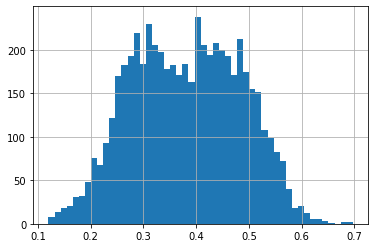

In [10]:
dfIDH_1991['IDHM'].hist(bins=50)

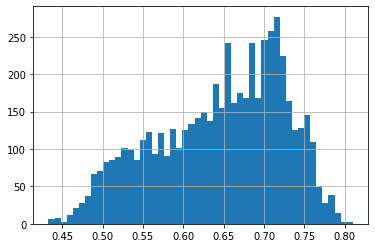

In [11]:
dfIDH_1991['IDHM_L'].hist(bins=50)

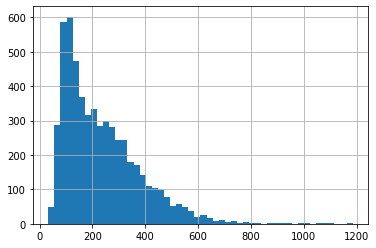

In [12]:
dfIDH_1991['RDPC'].hist(bins=50) # Renda per capita

In [13]:
dfIDH_1991[['RDPC','IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']].corr()

,RDPC,IDHM,IDHM_E,IDHM_L,IDHM_R
RDPC,1.000000,0.851182,0.791423,0.710204,0.943227
IDHM,0.851182,1.000000,0.968659,0.801583,0.897720
IDHM_E,0.791423,0.968659,1.000000,0.684742,0.802412
IDHM_L,0.710204,0.801583,0.684742,1.000000,0.789020
IDHM_R,0.943227,0.897720,0.802412,0.789020,1.000000


In [14]:
dfIDH_2000[['RDPC','IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']].corr()

,RDPC,IDHM,IDHM_E,IDHM_L,IDHM_R
RDPC,1.000000,0.878620,0.815036,0.773219,0.948658
IDHM,0.878620,1.000000,0.975847,0.870053,0.929387
IDHM_E,0.815036,0.975847,1.000000,0.782391,0.846917
IDHM_L,0.773219,0.870053,0.782391,1.000000,0.836550
IDHM_R,0.948658,0.929387,0.846917,0.836550,1.000000


In [15]:
dfIDH_2010[['RDPC','IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']].corr()

,RDPC,IDHM,IDHM_E,IDHM_L,IDHM_R
RDPC,1.000000,0.907988,0.791389,0.784216,0.961664
IDHM,0.907988,1.000000,0.950875,0.852149,0.948321
IDHM_E,0.791389,0.950875,1.000000,0.704460,0.819628
IDHM_L,0.784216,0.852149,0.704460,1.000000,0.833867
IDHM_R,0.961664,0.948321,0.819628,0.833867,1.000000


## 5.1 Explorando o Índice Desenvolvimento Humano Municipal

In [16]:
dfIDH_2000.IDHM.describe()

count    5565.000000
mean        0.523481
std         0.104396
min         0.208000
25%         0.436000
50%         0.533000
75%         0.609000
max         0.820000
Name: IDHM, dtype: float64

## <font color = 'red'> 75% dos IDHM estão concentrados entre **0.436** e **0.609** 

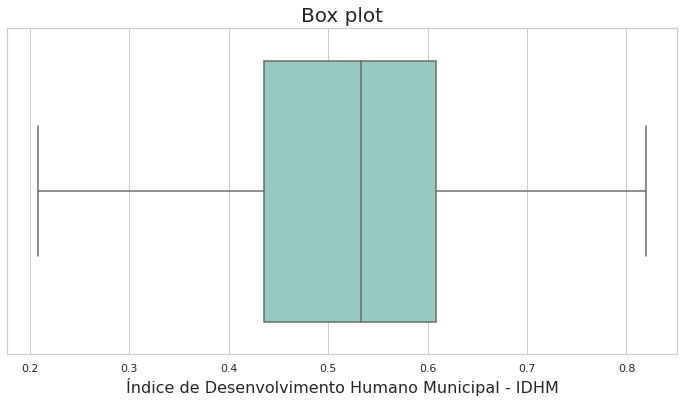

In [17]:
sns.set(style='whitegrid')
ax = sns.boxplot(data=dfIDH_2000, x='IDHM', width=0.8, linewidth=1.5,palette="Set3")
ax.figure.set_size_inches(12,6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Índice de Desenvolvimento Humano Municipal - IDHM', fontsize=16)
ax

### <font color=green> Parece que os dados seguem quase uma distribuição normal. </font> 

<font color=blue> Quando vai chegando ao índice 0.500, vai diminuindo as frequências. Só que depois do 0.500, as frequências vão aumentando  </font>

Text(0.5, 0, 'Índice de Desenvolvimento Humano Municipal - IDHM')

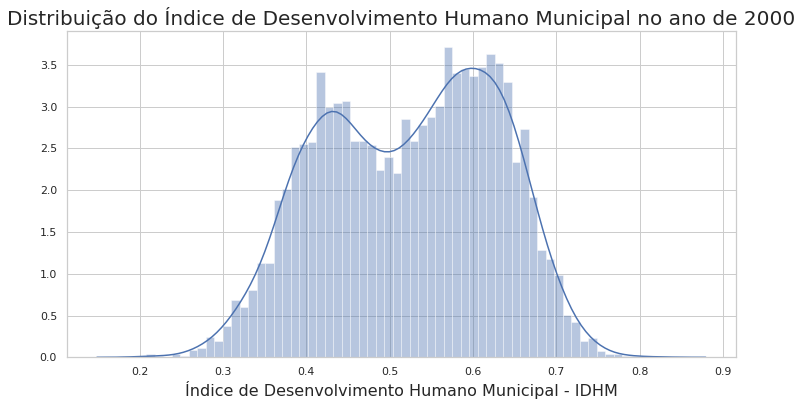

In [18]:
ax = sns.distplot(a=dfIDH_2000.IDHM, bins = 60)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição do Índice de Desenvolvimento Humano Municipal no ano de 2000', fontsize=20)
ax.set_xlabel('Índice de Desenvolvimento Humano Municipal - IDHM', fontsize=16)

## 5.2 Explorando Renda per Capita (RDPC)

In [19]:
dfIDH_2000.RDPC.describe()

count    5565.000000
mean      338.542322
std       192.443425
min        62.650000
25%       173.490000
50%       308.580000
75%       463.200000
max      1759.760000
Name: RDPC, dtype: float64

## <font color = 'red'> Justamente por ser uma variável de renda, é esperado que a concentração da Renda per Capita esteja nos menores valores. </font>

<font color = 'blue'> Vou analisar as Rendas Per Capitas que aparecem como "OutSiders" </color>

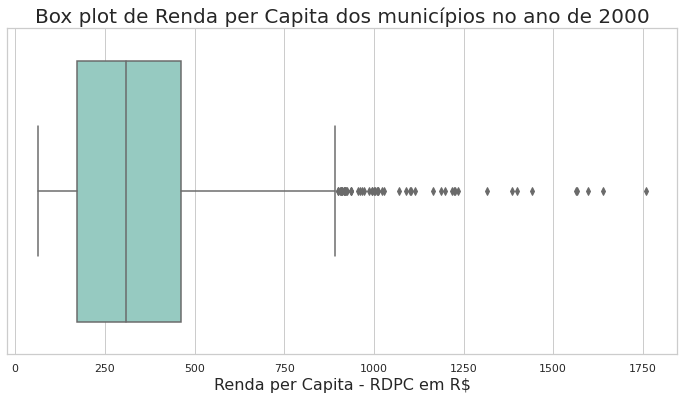

In [20]:
sns.set(style='whitegrid')
ax = sns.boxplot(data=dfIDH_2000, x='RDPC', width=0.8, linewidth=1.5,palette="Set3")
ax.figure.set_size_inches(12,6)
ax.set_title('Box plot de Renda per Capita dos municípios no ano de 2000', fontsize=20)
ax.set_xlabel('Renda per Capita - RDPC em R$', fontsize=16)
ax

### <font color = 'red'> Como disse no comentário acima, é esperado que o gráfico esteja com a distribuição maior do lado esquerdo. Justamente por ser distribuição de Renda Per Capita </font>

Text(0.5, 0, 'Renda per Capita - RDPC em (R$)')

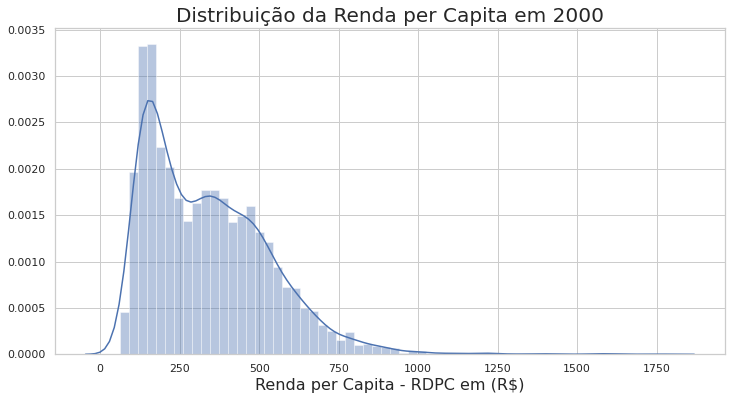

In [21]:
ax = sns.distplot(a=dfIDH_2000.RDPC, bins = 60)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição da Renda per Capita em 2000', fontsize=20)
ax.set_xlabel('Renda per Capita - RDPC em (R$)', fontsize=16)

### <font color = 'red'> Analisando as maiores rendas per capita. Não consegui tirar nenhum conclusão além do óbvio: S]ao cidades com uma ótima infra-estrutura  </font>

In [30]:
colunas = ['Município','ESPVIDA','MORT1','RDPC','RDPC5','R2040','IDHM','IDHM_E', 'IDHM_L','IDHM_R', 'PRENTRAB','pesotot','T_AGUA','AGUA_ESGOTO','REN0',
           'REN1','REN2','REN3','PMPOB']
dfIDH_2000[colunas].sort_values(by='RDPC', ascending=False).head(10)  

,Município,ESPVIDA,MORT1,RDPC,RDPC5,R2040,IDHM,IDHM_E,IDHM_L,IDHM_R,PRENTRAB,pesotot,T_AGUA,AGUA_ESGOTO,REN0,REN1,REN2,REN3,PMPOB
3272,ÁGUAS DE SÃO PEDRO,77.18,11.40,1759.76,5380.11,15.71,0.791,0.657,0.870,0.867,62.48,1883,100.00,0.00,2.89,19.67,52.18,62.37,0.70
3811,SÃO CAETANO DO SUL,77.18,11.40,1639.93,4502.58,9.32,0.820,0.740,0.870,0.855,81.10,140159,99.36,0.00,1.31,8.44,33.33,44.98,1.38
3221,NITERÓI,72.26,14.04,1596.51,4871.07,16.80,0.771,0.684,0.788,0.851,67.53,459451,87.83,3.72,1.51,21.28,46.81,56.54,6.60
3794,SANTANA DE PARNAÍBA,73.29,17.40,1565.51,6064.71,32.53,0.713,0.530,0.805,0.848,84.07,74828,90.62,4.20,1.33,16.67,55.74,64.53,11.53
4336,BALNEÁRIO CAMBORIÚ,74.76,15.47,1563.49,5526.50,20.05,0.777,0.668,0.829,0.848,55.85,73455,99.24,0.68,2.16,18.50,55.66,66.47,6.63
3808,SANTOS,73.58,16.88,1441.86,4116.02,10.98,0.785,0.714,0.810,0.835,69.03,417983,98.76,0.14,1.39,13.72,42.60,54.51,3.49
4927,PORTO ALEGRE,73.65,16.04,1399.50,4449.41,17.45,0.744,0.612,0.811,0.830,71.52,1360590,97.39,1.02,1.47,20.22,49.72,60.41,8.49
4397,FLORIANÓPOLIS,74.35,18.26,1383.78,4154.77,13.85,0.766,0.660,0.823,0.828,70.53,342695,96.21,0.52,1.42,17.16,48.32,59.51,5.31
3173,VITÓRIA,70.74,26.73,1315.63,4154.64,18.93,0.759,0.700,0.762,0.820,73.51,292944,97.42,0.15,1.45,26.56,52.51,61.21,10.30
3902,VINHEDO,74.67,15.10,1235.29,3744.62,11.18,0.749,0.626,0.828,0.810,83.90,47215,98.97,0.04,0.96,12.88,49.35,63.67,3.93


In [24]:
dfIDH_2000[colunas].sample(n = 8, random_state = 25454)

,Município,ESPVIDA,MORT1,RDPC,RDPC5,R2040,IDHM,IDHM_E,IDHM_L,IDHM_R,PRENTRAB,pesotot,T_AGUA,AGUA_ESGOTO,REN0,REN1,REN2,REN3,PMPOB
918,BELA CRUZ,62.24,63.28,124.25,352.85,11.84,0.406,0.244,0.621,0.441,67.77,28358,28.39,31.07,13.53,89.32,95.75,97.22,74.07
2177,SÃO DESIDÉRIO,64.30,44.73,163.73,462.30,14.22,0.398,0.199,0.655,0.485,73.38,19325,47.32,4.58,7.73,68.34,92.54,96.92,60.62
5482,NOVA VENEZA,68.82,29.70,320.19,840.64,7.61,0.549,0.382,0.730,0.593,81.09,6414,94.31,1.59,4.63,63.69,89.11,93.45,26.21
1863,BARRA DO ROCHA,59.20,65.00,162.51,496.03,10.98,0.386,0.208,0.570,0.484,78.95,8302,35.68,24.73,2.44,83.26,94.65,96.57,70.07
1513,CHÃ GRANDE,65.84,54.20,190.04,486.38,7.32,0.427,0.224,0.681,0.509,72.61,18407,49.51,21.41,8.80,81.17,93.62,95.57,51.97
3885,TURMALINA,71.95,19.70,391.28,991.00,6.86,0.653,0.568,0.783,0.625,80.40,2366,99.21,0.00,6.18,51.64,80.18,87.83,15.81
3679,PEDERNEIRAS,72.58,18.60,519.74,1451.64,8.75,0.663,0.548,0.793,0.671,78.07,36614,97.56,0.09,1.02,35.48,72.80,81.11,12.07
3277,ALTINÓPOLIS,73.55,16.90,772.55,2662.55,15.09,0.658,0.479,0.809,0.734,85.02,15481,99.70,0.11,0.98,39.09,75.90,84.36,11.34


## 5.3 Analisando correlações das variáveis

In [0]:
colunas = ['Município','ESPVIDA','MORT1','RDPC','RDPC5','R2040','IDHM','IDHM_E', 'IDHM_L','IDHM_R', 'PRENTRAB','pesotot','T_AGUA','AGUA_ESGOTO','REN0',
           'REN1','REN2','REN3','PMPOB']

In [0]:
#dfIDH_2000[colunas].corr()

## <font color = 'blue'> Aqui na Reta de Regressão fica bem evidente que a partir de 800 R$ de renda per capita, a ***esperança de vida*** tende a ter uma correlação bem fraca com a ***Renda per Capita*** </font>

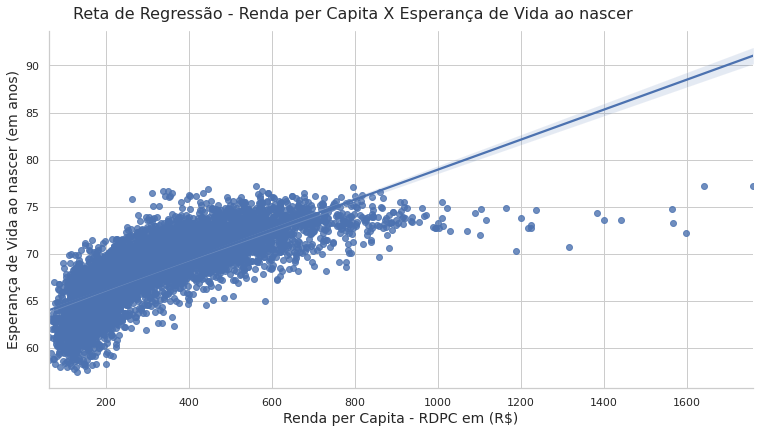

In [41]:
ax = sns.lmplot(data=dfIDH_2000,x='RDPC', y='ESPVIDA')
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Renda per Capita X Esperança de Vida ao nascer', fontsize=16, y=1.02)
ax.set_xlabels("Renda per Capita - RDPC em (R$)", fontsize=14)
ax.set_ylabels("Esperança de Vida ao nascer (em anos)", fontsize=14)



> ## <font color = 'blue'> Aqui na Reta de Regressão fica bem evidente que a partir de 650 R$ de renda per capita, a ***Mortalidade Infantil até 1 ano*** tende a ter uma correlação bem fraca com a ***Renda per Capita*** </font>

**Mortalidade Infantil até 1 ano -> quantidade de crianças até 1 ano que não deverão sobreviver a cada 1000 crianças nascidas vivas**


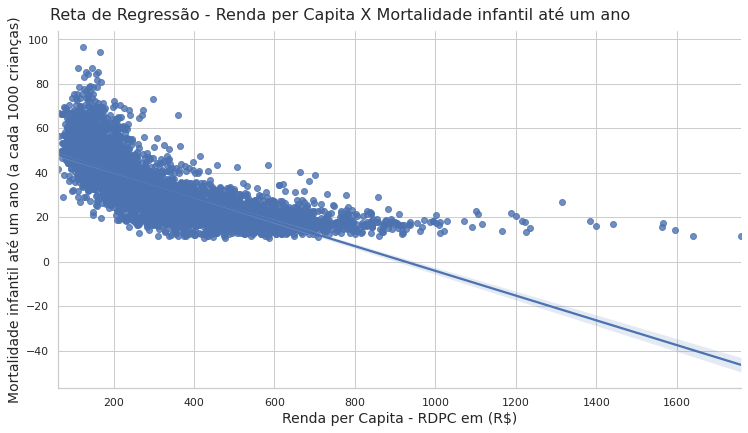

In [44]:
ax = sns.lmplot(data=dfIDH_2000,x='RDPC', y='MORT1')
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Renda per Capita X Mortalidade infantil até um ano', fontsize=16, y=1.02)
ax.set_xlabels("Renda per Capita - RDPC em (R$)", fontsize=14)
ax.set_ylabels("Mortalidade infantil até um ano (a cada 1000 crianças)", fontsize=14)

In [29]:
dfIDH_2000[colunas].sort_values(by='R2040', ascending=False).head(4)  

,Município,ESPVIDA,MORT1,RDPC,RDPC5,R2040,IDHM,IDHM_E,IDHM_L,IDHM_R,PRENTRAB,pesotot,T_AGUA,AGUA_ESGOTO,REN0,REN1,REN2,REN3,PMPOB
2330,Bonito de Minas,65.35,44.61,85.69,302.29,7891.53,0.336,0.148,0.673,0.381,58.77,7863,21.22,3.83,70.31,90.82,97.32,98.27,81.07
107,JUTAÍ,64.21,50.40,119.48,480.28,4297.56,0.304,0.099,0.654,0.434,86.05,22500,17.54,30.20,39.65,77.83,92.54,96.42,82.81
1594,QUIXABA,61.78,73.83,106.26,378.85,1331.63,0.394,0.240,0.613,0.416,47.87,6855,34.16,5.85,73.90,91.49,96.46,99.03,74.12
2072,MANSIDÃO,66.81,36.30,88.61,303.23,940.23,0.389,0.218,0.697,0.386,55.07,11902,17.23,10.17,46.97,84.81,95.18,97.75,78.81
